In [3]:
suppressMessages(library(dplyr))
library(ggplot2)
suppressMessages(library(tidyr))

1). scatterplot

In [7]:
load("../data/mlb11.rda")

In [9]:
df <- mlb11

In [11]:
head(df)

team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725


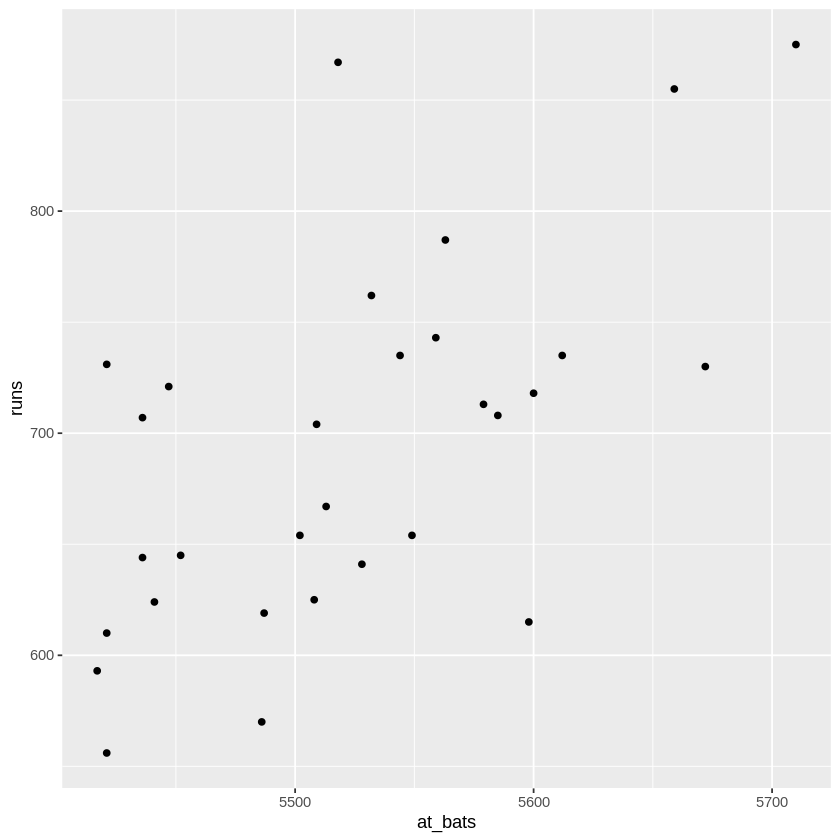

In [22]:
ggplot(df, aes(x=at_bats, y=runs)) + geom_point()

2) linear

In [13]:
mlb11 %>%
  summarise(cor(runs, at_bats))

"cor(runs, at_bats)"
<dbl>
0.610627


3) D, The relationship is positive, linear, and very weak. One of the potential outliers is a team with approximately 5520 at bats. 

In [31]:
fit = lm(runs~homeruns, data=df)

In [32]:
fit


Call:
lm(formula = runs ~ homeruns, data = df)

Coefficients:
(Intercept)     homeruns  
    415.239        1.835  


In [33]:
summary(fit)


Call:
lm(formula = runs ~ homeruns, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


In [34]:
df$predicted <- predict(fit)
df$residuals <- residuals(fit)

In [35]:
df %>% select(runs, predicted, residuals) %>% head()

runs,predicted,residuals
<int>,<dbl>,<dbl>
855,800.4926,54.50737
875,787.6508,87.34917
787,725.2764,61.72358
730,651.8948,78.10525
762,712.4346,49.56537
718,613.3694,104.63062


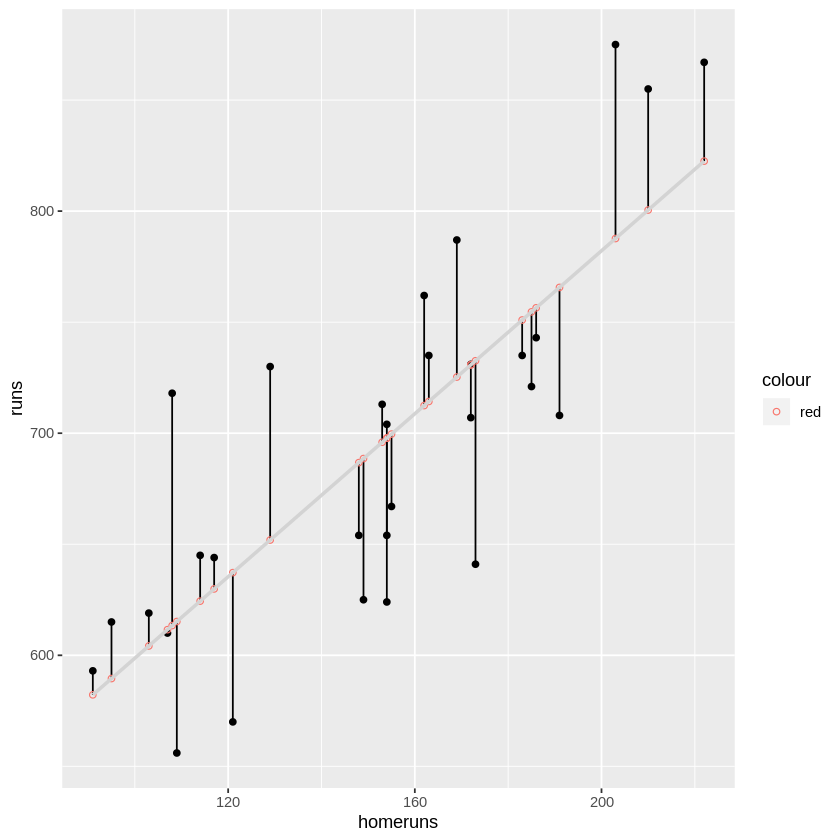

In [54]:
ggplot(df, aes(x=homeruns, y=runs)) + geom_point() +
geom_segment(aes(xend = homeruns, yend = predicted)) +
geom_point(aes(y = predicted, colour="red"), shape = 1) +
geom_smooth(method = "lm", se = FALSE, color = "lightgrey")

In [47]:
fo <- runs~homeruns

In [49]:
m <- lm(df$runs ~ df$homeruns)
a <- signif(coef(m)[1], digits = 2)
b <- signif(coef(m)[2], digits = 2)
textlab <- paste("y = ",b,"x + ",a, sep="")
print(textlab)

[1] "y = 1.8x + 420"


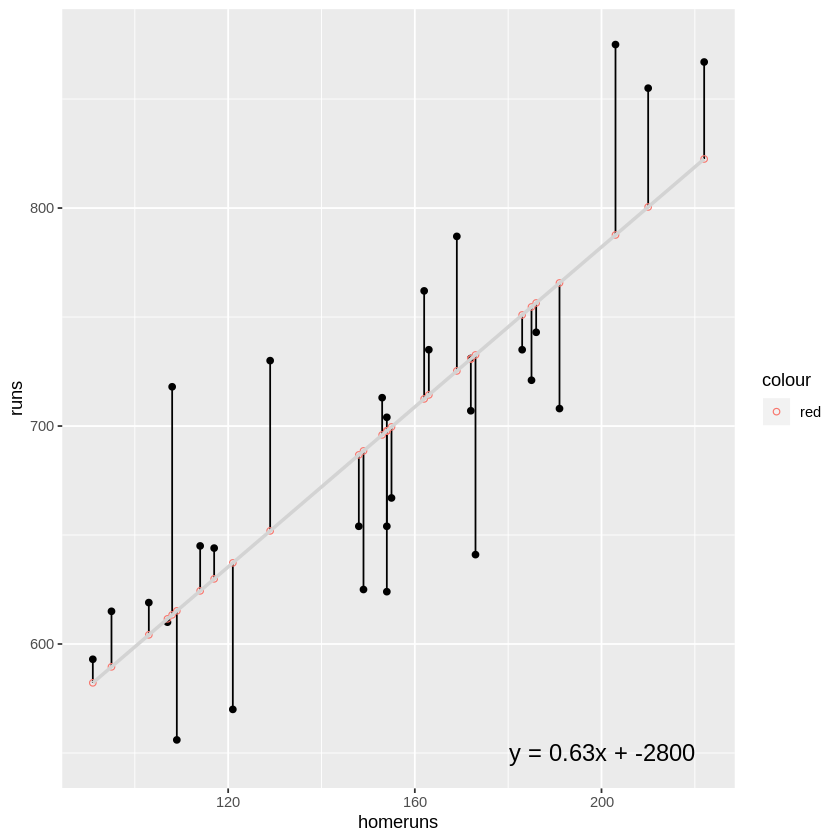

In [69]:
ggplot(df, aes(x=homeruns, y=runs)) + geom_point() +
geom_segment(aes(xend = homeruns, yend = predicted)) +
geom_point(aes(y = predicted, colour="red"), shape = 1) +
geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +
annotate("text", x = 200, y = 550, label = textlab, color="black", size = 5, parse=FALSE)

4) A For each additional home run, the model predicts 1.83 more runs, on average.

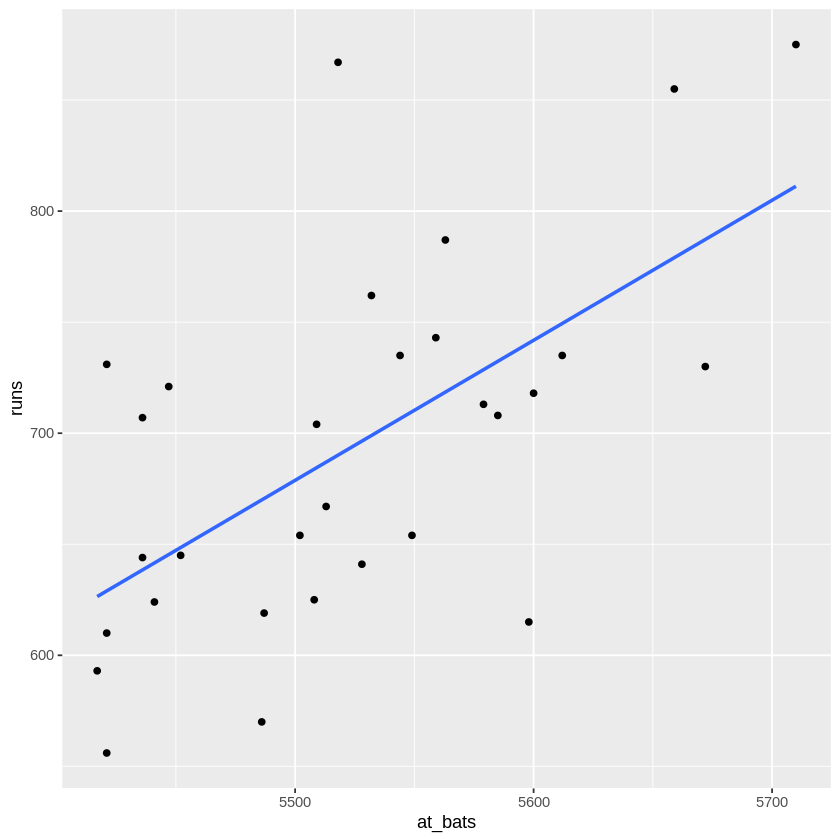

In [57]:
ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

In [55]:
mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)

runs
<int>
713


residual = Observed value - predicted     

5) B, 15.32

In [59]:
m1 <- lm(runs ~ at_bats, data = mlb11)

In [63]:
summary(m1)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


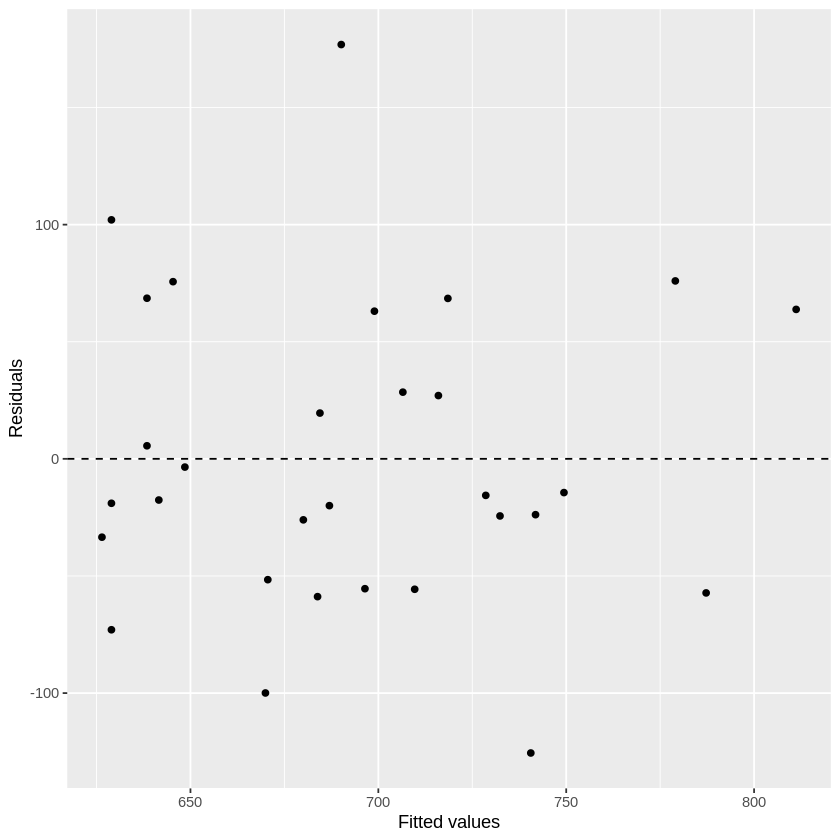

In [64]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

6) B, show a curved pattern

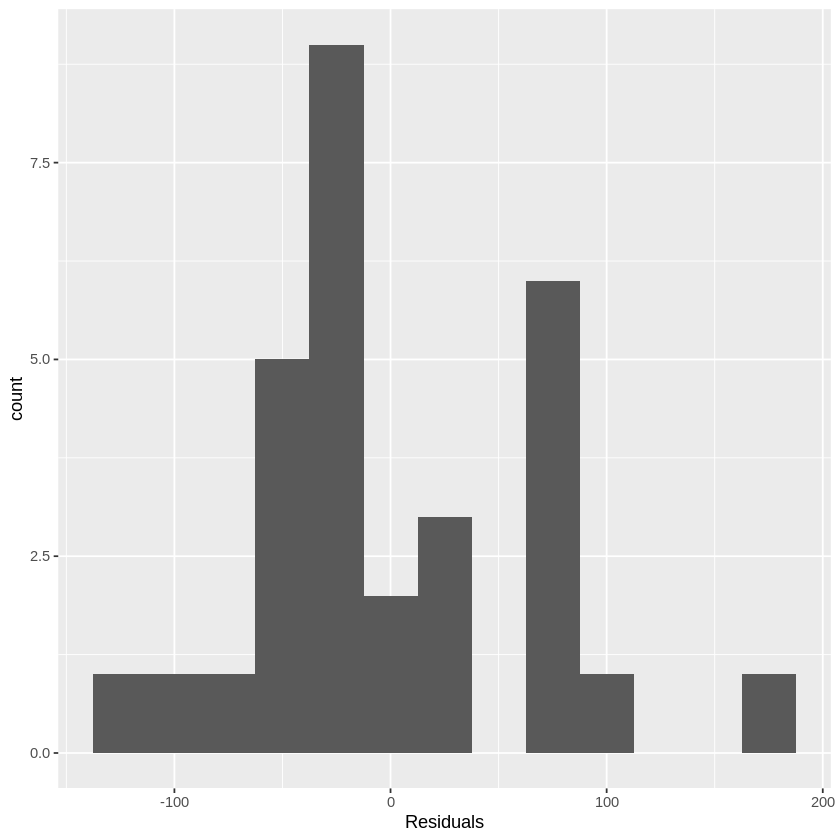

In [65]:
ggplot(data = m1, aes(x = .resid)) +
  geom_histogram(binwidth = 25) +
  xlab("Residuals")

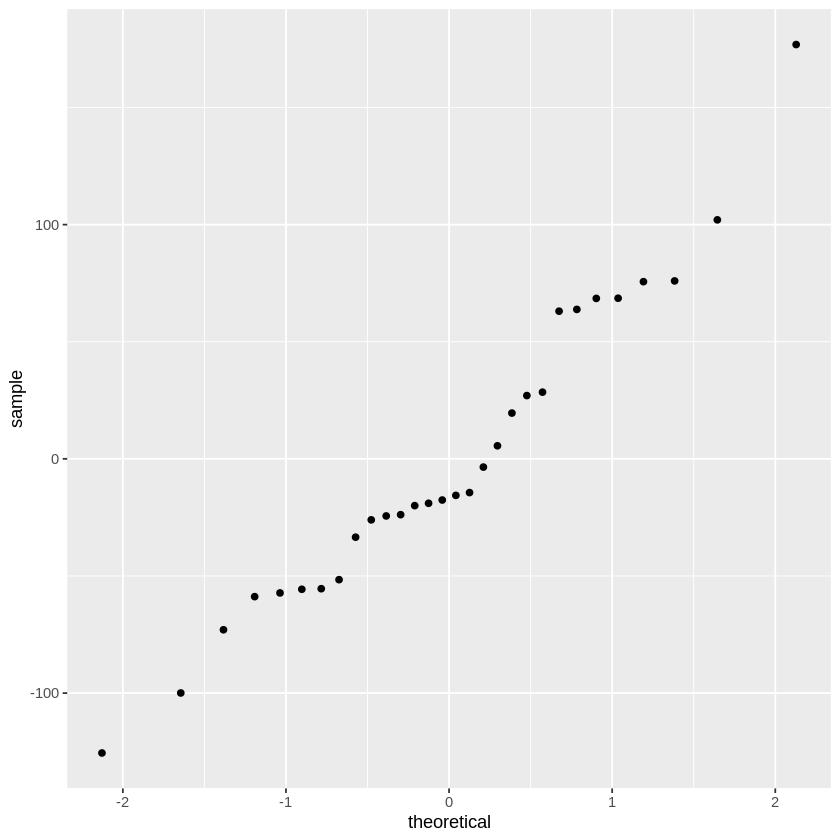

In [66]:
ggplot(data = m1, aes(sample = .resid)) +
  stat_qq()

7) D, slightly longer tail on the right.

8) True

### Week 3

In [4]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [6]:
load("../data/evals.rda")

In [8]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,⋯,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color


1) Observational study

2) Yes, revise wording to "Is there an association between beauty and course evaluations?"

In [9]:
summary(evals$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.800   4.300   4.175   4.600   5.000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


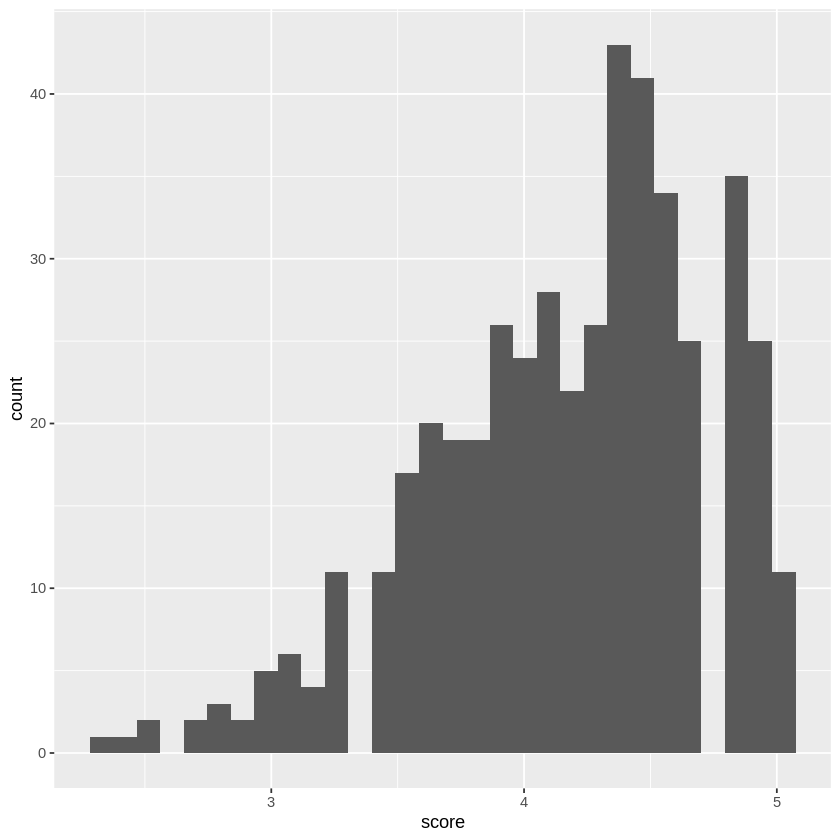

In [11]:
ggplot(evals, aes(x=score)) + geom_histogram()

3) 25\% of the students gave their professors a score of over 4.6.

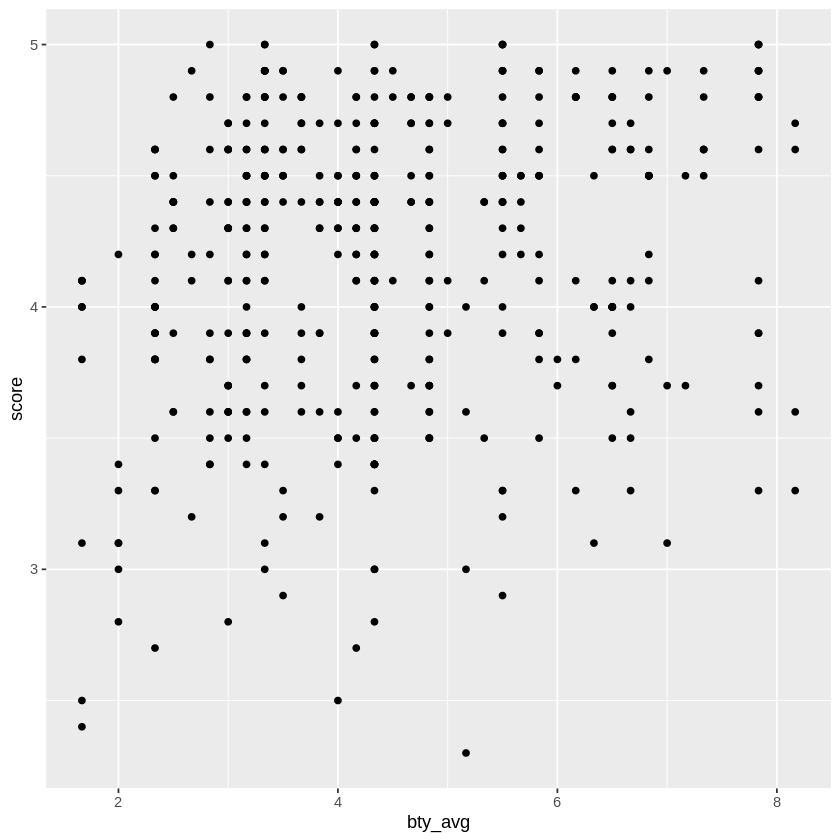

In [12]:
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_point()

In [15]:
nrow(evals)

[1] 463

In [20]:
m_bty <- lm(evals$score ~ evals$bty_avg)

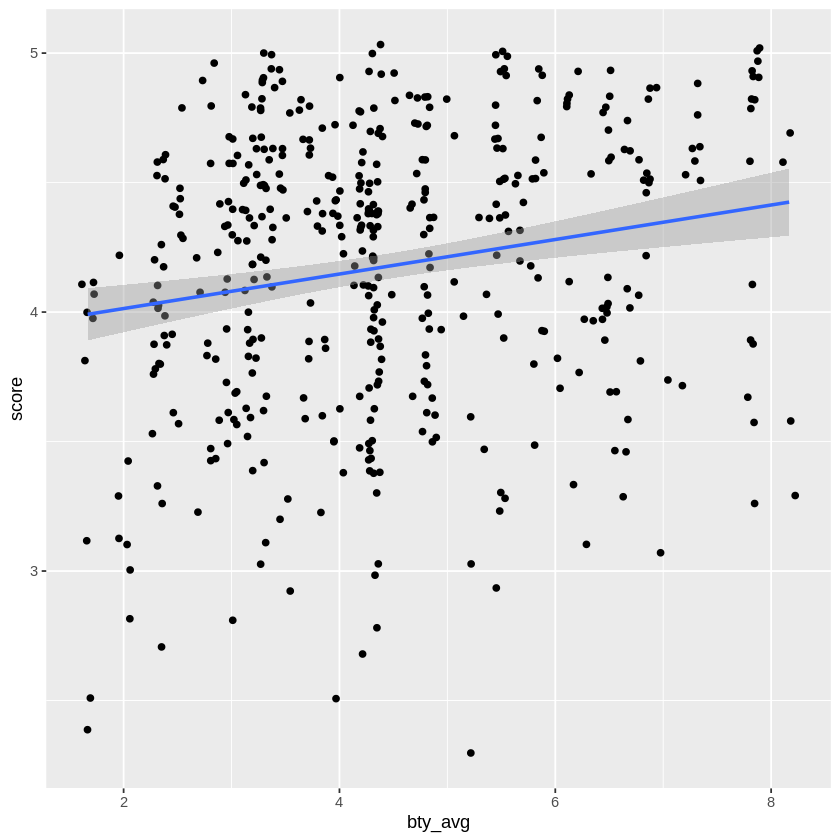

In [21]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  geom_smooth(method = "lm")

In [22]:
summary(m_bty)


Call:
lm(formula = evals$score ~ evals$bty_avg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9246 -0.3690  0.1420  0.3977  0.9309 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.88034    0.07614   50.96  < 2e-16 ***
evals$bty_avg  0.06664    0.01629    4.09 5.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5348 on 461 degrees of freedom
Multiple R-squared:  0.03502,	Adjusted R-squared:  0.03293 
F-statistic: 16.73 on 1 and 461 DF,  p-value: 5.083e-05


4) False

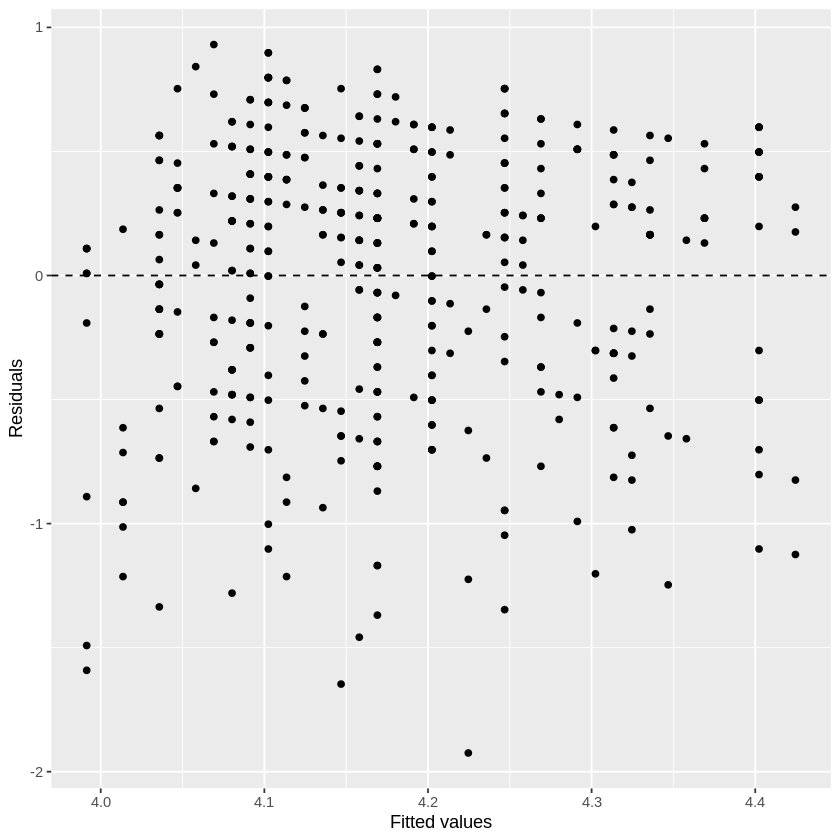

In [23]:
ggplot(data = m_bty, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

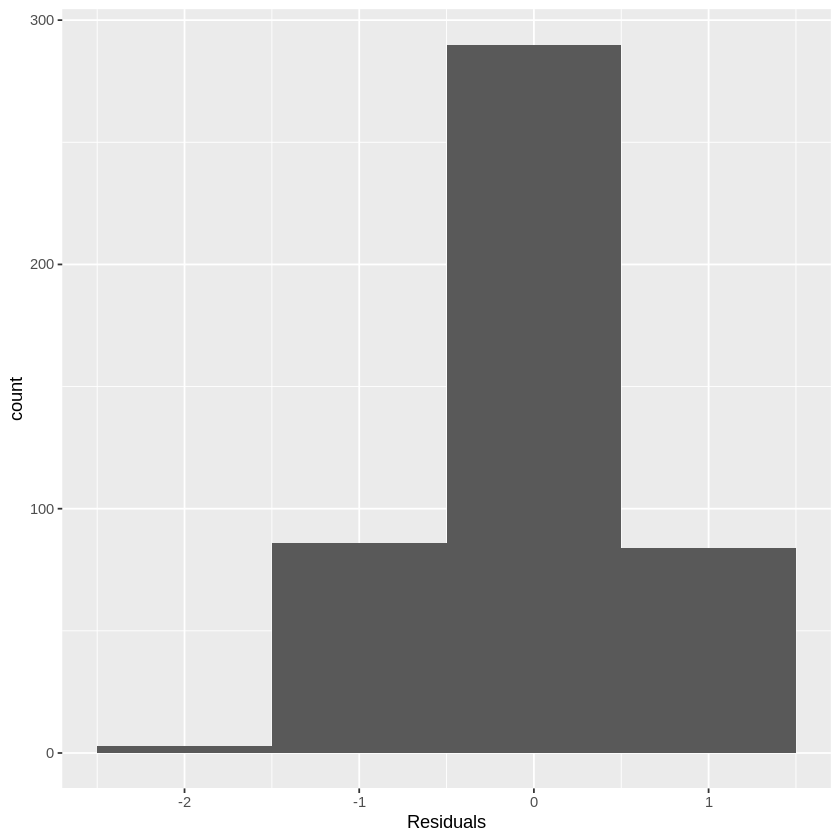

In [31]:
ggplot(data = m_bty, aes(x = .resid)) +
  geom_histogram(binwidth = 1) +
  xlab("Residuals")

5) Nearly normal residuals: Residuals are right skewed, but the sample size is large, so this may not be an important violation of conditions.

"cor(bty_avg, bty_f1lower)"
<dbl>
0.8439112


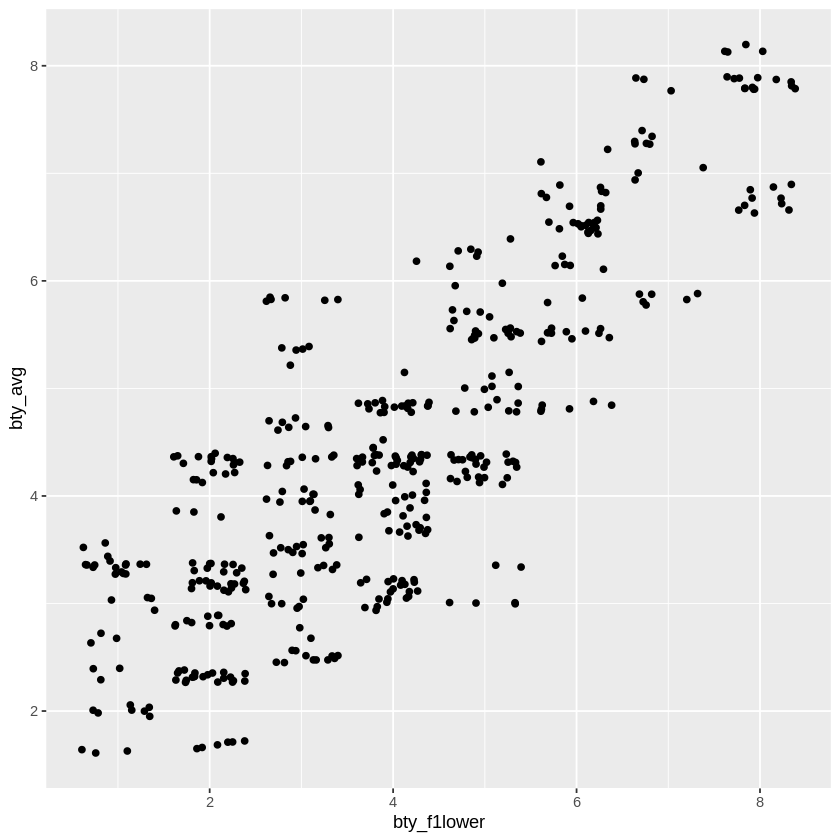

In [33]:
ggplot(data = evals, aes(x = bty_f1lower, y = bty_avg)) +
  geom_jitter()
evals %>% 
  summarise(cor(bty_avg, bty_f1lower))

In [34]:
m_bty_gen <- lm(score ~ bty_avg + gender, data = evals)
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


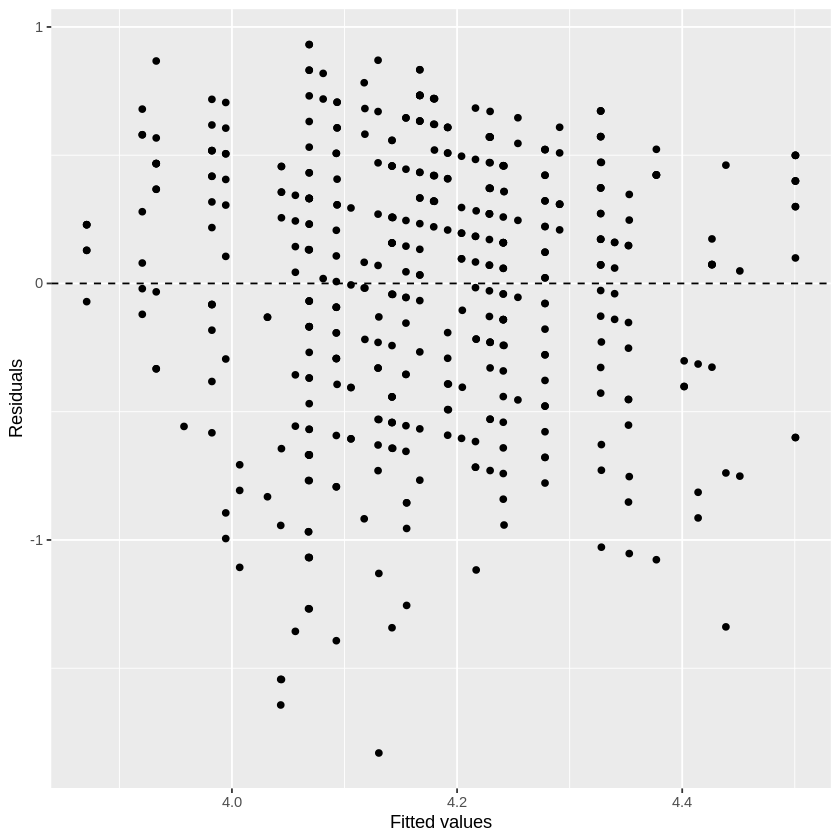

In [35]:
ggplot(data = m_bty_gen, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

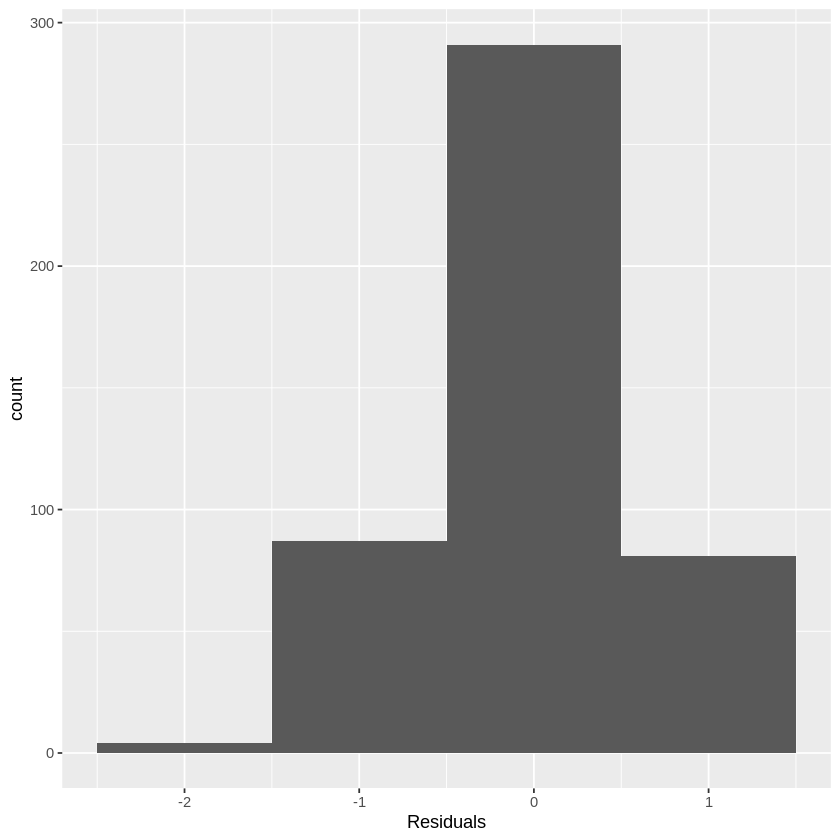

In [36]:
ggplot(data = m_bty_gen, aes(x = .resid)) +
  geom_histogram(binwidth = 1) +
  xlab("Residuals")

6) True

7) True

In [37]:
m_bty_gen <- lm(score ~ bty_avg + rank, data = evals)
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + rank, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8713 -0.3642  0.1489  0.4103  0.9525 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.98155    0.09078  43.860  < 2e-16 ***
bty_avg           0.06783    0.01655   4.098 4.92e-05 ***
ranktenure track -0.16070    0.07395  -2.173   0.0303 *  
ranktenured      -0.12623    0.06266  -2.014   0.0445 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5328 on 459 degrees of freedom
Multiple R-squared:  0.04652,	Adjusted R-squared:  0.04029 
F-statistic: 7.465 on 3 and 459 DF,  p-value: 6.88e-05


8) Teaching, Tenured, Tenure Track

9) .12 higher